In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_SEED = 33

In [2]:
PATH_WINEQUALITY_CSV = '../data/winequality-white.csv'

In [3]:
df = pd.read_csv(PATH_WINEQUALITY_CSV, sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# Data

`DÚVIDAS`

- **Registros duplicados**: É necessário excluir registros duplicados?
- **Regressão ou classificação?**: O treinamento deve ser realizado com o objetivo de regressão ou classificação? Se for em classificação, que classes utilizar?

Duplicados

In [4]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4671,4.9,0.335,0.14,1.3,0.036,69.0,168.0,0.99212,3.47,0.46,10.466667,5
4672,4.9,0.335,0.14,1.3,0.036,69.0,168.0,0.99212,3.47,0.46,10.466667,5
3941,4.9,0.345,0.34,1.0,0.068,32.0,143.0,0.99138,3.24,0.40,10.100000,5
3950,4.9,0.345,0.34,1.0,0.068,32.0,143.0,0.99138,3.24,0.40,10.100000,5
2990,5.0,0.270,0.32,4.5,0.032,58.0,178.0,0.98956,3.45,0.31,12.600000,7
...,...,...,...,...,...,...,...,...,...,...,...,...
2312,9.4,0.280,0.30,1.6,0.045,36.0,139.0,0.99534,3.11,0.49,9.300000,5
3094,9.7,0.240,0.49,4.9,0.032,3.0,18.0,0.99368,2.85,0.54,10.000000,6
3095,9.7,0.240,0.49,4.9,0.032,3.0,18.0,0.99368,2.85,0.54,10.000000,6
1372,10.7,0.220,0.56,8.2,0.044,37.0,181.0,0.99800,2.87,0.68,9.500000,6


In [5]:
df.shape

(4898, 12)

In [6]:
df.drop_duplicates().shape

(3961, 12)

In [7]:
df = df.drop_duplicates()

NaN/null

In [8]:
df.isna().any(axis=0).any()

False

not finite

In [9]:
np.isinf(df).any(axis=0).any()

False

Using quality column as a category

In [10]:
df['quality'] = df['quality'].astype('category')

/tmp/ipykernel_69462/4240098571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quality'] = df['quality'].astype('category')


## Data investigation

<AxesSubplot:xlabel='quality', ylabel='count'>

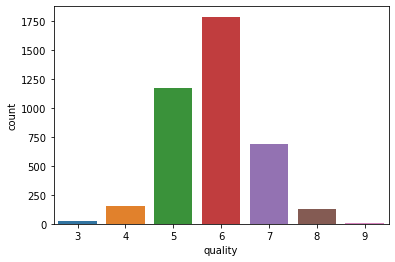

In [11]:
sns.countplot(data=df, x='quality')

In [12]:
(df['quality'].value_counts(normalize=True)*100)

6    45.140116
5    29.664226
7    17.394597
4     3.862661
8     3.307246
3     0.504923
9     0.126231
Name: quality, dtype: float64

## Train, test split

In [13]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=RANDOM_SEED, stratify=df['quality'])

In [14]:
df_train['quality'].value_counts(normalize=True)*100

6    45.129870
5    29.653680
7    17.388167
4     3.860029
8     3.318903
3     0.505051
9     0.144300
Name: quality, dtype: float64

In [15]:
df_test['quality'].value_counts(normalize=True)*100

6    45.164003
5    29.688814
7    17.409588
4     3.868797
8     3.280067
3     0.504626
9     0.084104
Name: quality, dtype: float64

In [16]:
df_train.to_csv('../data/train.csv', index=False)
df_test.to_csv('../data/test.csv', index=False)